In [1]:
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import correlate as correlate
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
import time


In [2]:
#primerjava DFT in FFT:

def vzorec_prep(T,N):
    #pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba
    dt = T/N
    nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
    nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 
    t = np.arange(0,T, dt)
    nu_min = 1/dt
    return t, nus, nu_c, nu_min, dt



def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(list(map(lambda x: round(x)-1, result)), dtype=np.uint64)

Ns = gen_log_space(100000, 20)[1:]
print(Ns)

def DFT(y,roll=False):
    N = np.shape(y)[0]
    # delta = len(y)/N
    c = np.zeros(np.shape(y), complex)
    n = np.arange(N)
    for k in range(N):
        c[k] = np.sum(y * np.exp(-1j * 2 * np.pi * k * n/N))  # ker tle ni  *delta -> na koncu delis z N
    if roll == True:
        return np.roll(c,N//2)
    return c


T = 1000
ns = np.arange(1,100,1)
extended = np.array([200, 500, 1000])
ns = np.concatenate((ns,extended))
lambs=[0.5]

# time_moj = []
# err_moj = []

# for N in Ns:
#     time_moj_temp = []
#     t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    
#     t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
#     t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
#     t03 = 20

#     #šum:
#     seed = 10
#     a = 0
#     noise = (np.random.random(len(t))) * (2 * a) - a

#     y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

#     for _ in range(8):
#         start_time = time.time()
#         res = DFT(y)
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         time_moj_temp.append(elapsed_time)
#     time_moj.append(np.average(time_moj_temp)) #povprecen cas za izracun qr za 50 lamb
#     err_moj.append(np.std(time_moj_temp)) #povprecen cas za izracun qr za 5 lamb
#     plt.close
#     print(N)
# np.save("time_moj_dft_10", time_moj)
# np.save("err_moj_dft_10", err_moj)

# # 14348907
# Ns = gen_log_space(10000000, 20)[1:]

# time_np = []
# err_np = []

# for N in Ns:
#     time_np_temp = []
#     t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    
#     t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
#     t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
#     t03 = 20

#     #šum:
#     seed = 10
#     a = 0
#     noise = (np.random.random(len(t))) * (2 * a) - a

#     y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

#     for _ in range(8):
#         start_time = time.time()
#         res = np.fft.fft(y)
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         time_np_temp.append(elapsed_time)
#     time_np.append(np.average(time_np_temp)) #povprecen cas za izracun qr za 50 lamb
#     err_np.append(np.std(time_np_temp)) #povprecen cas za izracun qr za 5 lamb
#     plt.close()
#     print(N)
# np.save("time_npfft_10", time_np)
# np.save("err_npfft_10", err_np)


[    1     3     6    11    21    39    73   133   244   446   815  1487
  2713  4950  9031 16474 30052 54820 99999]


In [ ]:
from scipy.optimize import curve_fit
def n_log2_n(x, a, b):
    return a * x * np.log2(x) + b





time_np3 = np.load("time_npfft_potence3.npy")
err_np3 = np.load("err_npfft_potence3.npy")
time_np2 = np.load("time_npfft_potence2.npy")
err_np2 = np.load("err_npfft_potence2.npy")
time_moj = np.load("time_moj_dft_10.npy")
err_moj = np.load("err_moj_dft_10.npy")
time_np = np.load("time_npfft_10.npy")
err_np = np.load("err_npfft_10.npy")

plt.figure(figsize=(12,8))



plt.subplot(2,2,3)
Ns = gen_log_space(100000, 20)[1:]

coefficients, cov_matrix = np.polyfit(Ns, time_moj, 2, cov=True)
poly = np.poly1d(coefficients)

errors = np.sqrt(np.diag(cov_matrix))
x_fit1 = np.linspace(min(Ns), max(Ns), 100)
y_fit1 = poly(x_fit1)
print("guess1: ", poly(10**10))
print("guess1: ", poly(10**10)/60/60/24/365)


print(f'Fitted Coefficients: {coefficients}')
print(f'Errors of Coefficients: {errors}')
plt.plot(x_fit1,y_fit1, label=r'model: $f(x) = a + b \cdot x + c \cdot x^2$')

Ns = gen_log_space(100000, 20)[1:]
plt.errorbar(Ns, time_moj,yerr=err_moj, linestyle='', marker='o', label='lastna implementacija DFT')
plt.xscale('log')
plt.xlim(10**2,np.max(Ns)+np.max(Ns)/6)
plt.title('Model časovne zahtevnosti za DFT')
plt.xlabel('N = št. vzorcev')
plt.ylabel(r't [s]')
plt.grid()
plt.legend()

coeff_x, coeff_y = 120, 120  # Adjust the coordinates as needed

coeff_text = fr'$a = {coefficients[0]:.2e} \pm {errors[0]:.0e}$' + '\n' + fr'$b = {coefficients[1]:.1e} \pm {errors[1]:.0e}$' + '\n' + fr'$c = {coefficients[2]:.2f} \pm {errors[2]:.2f}$'
plt.text(coeff_x, coeff_y, coeff_text, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))


plt.subplot(2,2,4)
Ns = [2**k for k in range(25)]
params, covariance = curve_fit(n_log2_n, Ns, time_np2)
print(params)
print(np.sqrt(np.diag(covariance)))
a_fit, b_fit = params

x_fit2 = np.linspace(min(Ns), max(Ns), 100)
y_fit2 = n_log2_n(x_fit, a_fit, b_fit)
print("guess2: ", n_log2_n(10**10, a_fit, b_fit)/60)


plt.plot(x_fit2,y_fit2, label=r'Model: $f(x) = a \cdot N \cdot log_2(N) + b$')
Ns = [2**k for k in range(25)]
plt.errorbar(Ns, time_np2,yerr=err_np2, linestyle='', marker='o',label='np.fft.fft() - potence števila 2')
# plt.yscale('log')
plt.xlim(10**3,np.max(Ns)+np.max(Ns)/6)
plt.title(r'Model časovne zahtevnosti za FFT')
plt.xscale('log')
plt.xlabel('N = št. vzorcev')
plt.ylabel(r't [s]')
plt.grid()
plt.legend(loc='upper left')

coeff_x, coeff_y = 10**3+200, 0.51 
coeff_text = fr'$a = {a_fit:.2e} \pm {np.sqrt(covariance[0, 0]):.0e}$' + '\n' + fr'$b = {b_fit:.3f} \pm {np.sqrt(covariance[1, 1]):.3f}$'
plt.text(coeff_x, coeff_y, coeff_text, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))





plt.subplot(2,2,1)

Ns = gen_log_space(100000, 20)[1:]
plt.errorbar(Ns, time_moj,yerr=err_moj, linestyle='-', marker='.', label='lastna implementacija DFT')
Ns = [2**k for k in range(25)]
plt.errorbar(Ns, time_np2,yerr=err_np2, linestyle='-', marker='.',label='Potence števila 2')

plt.yscale('log')
plt.xscale('log')
plt.title('Primerjava časovne zahtevnosti DFT in FFT (potence števila 2)')
plt.xlabel('N = št. vzorcev')
plt.ylabel(r't [s]')
plt.grid()
plt.legend()



plt.subplot(2,2,2)
Ns = [2**k for k in range(25)]
plt.errorbar(Ns, time_np2,yerr=err_np2, linestyle='-', marker='.',label='Potence števila 2')
Ns = [3**k for k in range(16)]
plt.errorbar(Ns, time_np3,yerr=err_np3, linestyle='-', marker='.',label='Potence števila 3')
Ns = gen_log_space(10000000, 20)[1:]
plt.errorbar(Ns, time_np,yerr=err_np, linestyle='-', marker='.',label='Poljubna števila')

plt.yscale('log')
plt.xscale('log')
plt.title('Primerjava časovne zahtevnosti FFT glede na izbiro števil')
plt.xlabel('N = št. vzorcev')
plt.ylabel(r't [s]')
plt.grid()
plt.legend()


plt.tight_layout()
plt.savefig('cas_1')




In [5]:


# Ns = gen_log_space(100000, 20)[1:]
print(Ns)
Ns = np.array([3**k for k in range(16)])

print(Ns)
time_np = []
err_np = []


for N in Ns:
    time_np_temp = []
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    
    t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
    t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
    t03 = 20

    #šum:
    seed = 10
    a = 0
    noise = (np.random.random(len(t))) * (2 * a) - a

    y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

    for _ in range(8):
        start_time = time.time()
        res = np.fft.fft(y)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_np_temp.append(elapsed_time)
    time_np.append(np.average(time_np_temp)) #povprecen cas za izracun qr za 50 lamb
    err_np.append(np.std(time_np_temp)) #povprecen cas za izracun qr za 5 lamb
    plt.close()
    print(N)
np.save("time_npfft_potence3", time_np)
np.save("err_npfft_potence3", err_np)

Ns = [2**k for k in range(25)]

time_np = []
err_np = []

for N in Ns:
    time_np_temp = []
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    
    t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
    t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
    t03 = 20

    #šum:
    seed = 10
    a = 0
    noise = (np.random.random(len(t))) * (2 * a) - a

    y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

    for _ in range(8):
        start_time = time.time()
        res = np.fft.fft(y)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_np_temp.append(elapsed_time)
    time_np.append(np.average(time_np_temp)) #povprecen cas za izracun qr za 50 lamb
    err_np.append(np.std(time_np_temp)) #povprecen cas za izracun qr za 5 lamb
    plt.close()
    print(N)
np.save("time_npfft_potence2", time_np)
np.save("err_npfft_potence2", err_np)


[      1       4      12      29      69     161     378     885    2068
    4832   11287   26366   61584  143844  335981  784759 1832980 4281331
 9999999]
[       1        3        9       27       81      243      729     2187
     6561    19683    59049   177147   531441  1594323  4782969 14348907]


NameError: name 'vzorec_prep' is not defined

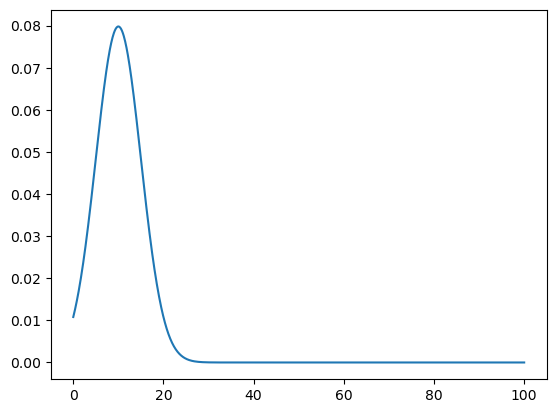

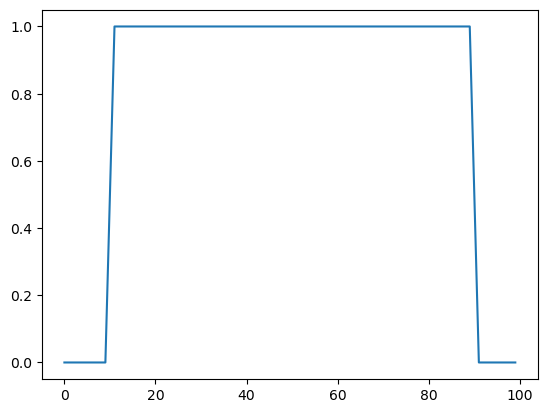

In [57]:
def gaus(x,mu,sig):
    return 1/np.sqrt(2*np.pi*sig**2) * np.exp(-1/2 * (x-mu)**2/sig**2)


#priprava vzorca:

def vzorec_prep(T,N):
    #pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba
    dt = T/N
    nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
    nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 
    t = np.arange(0,T, dt)
    nu_min = 1/dt
    return t, nus, nu_c, nu_min, dt

    
# # gaus
# plt.figure()
# x = np.linspace(0,100,1000)
# plt.plot(x, gaus(x,10,5))

# plt.figure()
# #box function
# y=np.ones((100))
# y[:len(y)//10]=0
# y[len(y)//10]=1/2
# y[9*len(y)//10:]=0
# y[9*len(y)//10]=1/2
# plt.plot(y)
# plt.show()


In [ ]:
# y = scipy.signal.correlate(gaus(x,15,15),gaus(x,15,15))
y=np.ones((100))
k = 10
y[:len(y)//k]=0
y[len(y)//k]=1/2
y[(k-1)*len(y)//k:]=0
y[(k-1)*len(y)//k]=1/2
for _ in range(5):
    # y =  scipy.signal.correlate(y,y)
    y = np.correlate(y,y,"full")
    y= y/np.max(y)
    x_cor = np.arange(-len(y)//2+1, len(y)//2+1, 1) #* dx
    plt.plot(x_cor,y,label=f'{_}')
    # plt.yscale('log')
# y = scipy.signal.correlate(y,y)
# y = scipy.signal.correlate(y,y)
plt.legend()
plt.xlim(-500,500)


In [ ]:
def correlate_n(x,y,n):
    """za periodično funkcijo"""
    N = max(len(x), len(y))
    # print(len(x), len(y))
    if len(x) > len(y):
        # print('f')
        y = np.pad(y, (0, len(x)-len(y)), 'constant', constant_values=(0))
        # print(y)
        # print(x)
    else:
        x = np.pad(x, (len(y)-len(x)), 'constant', constant_values=(0))
    # x,y = np.pad(y, (0, N), 'constant', constant_values=(0)), np.pad(x, (0, N), 'constant', constant_values=(0))
    # N = max(len(x), len(y))
    fi = np.sum(np.roll(y,-n) * x)
    return fi

def correlate_moj(x,y):
    N = max(len(x), len(y))
    res = [correlate_n(x,y,n) for n in range(N-2)]
    return res

def correlate_n_nep(x,y,n):
    """za periodično funkcijo"""
    N = max(len(x), len(y))
    # print(len(x), len(y))
    if len(x) > len(y):
        # print('f')
        y = np.pad(y, (0, len(x)-len(y)), 'constant', constant_values=(0))
        # print(y)
        # print(x)
    else:
        x = np.pad(x, (len(y)-len(x)), 'constant', constant_values=(0))
    # x,y = np.pad(y, (0, N), 'constant', constant_values=(0)), np.pad(x, (0, N), 'constant', constant_values=(0))
    # N = max(len(x), len(y))
    fi = np.sum(np.roll(y,-n)[:N-n-1] * x[:N-n-1])
    return fi

    #preveri ce je uredu roll

def correlate_moj_nep(x,y):
    N = max(len(x), len(y))
    res = [correlate_n_nep(x,y,n) for n in range(N-2)]
    return res

def correlate_moj_nep2(x,y):
    N = max(len(x), len(y))
    res = [correlate_n_nep(x,y,n) for n in np.arange(-N-2,N-2)]
    return 1/(N) * np.array(res)



# def correlate2(g, h):  # Simple and quick version
#     N = g.shape[0]
#     g = np.concatenate((g, np.zeros(N)))
#     h = np.concatenate((h, np.zeros(N)))
#     n = np.arange(0, 2*N)

#     G = np.fft.fft(g)
#     H = np.fft.fft(h)
#     # print(np.shape(G))
#     # print(np.shape(H))
#     p = G * np.conj(H)
#     # print(np.shape(p))
#     pi = 1/N*np.fft.ifft(p)
#     return n, np.real(np.fft.ifftshift(pi))

def correlate_fft(x,y):
    N = max(len(x), len(y))
    if len(x) > len(y):
        y = np.pad(y, (0, len(x)-len(y)), 'constant', constant_values=(0))
    else:
        x = np.pad(x, (0, len(y)-len(x)), 'constant', constant_values=(0))
    x,y = np.pad(y, (0, N), 'constant', constant_values=(0)), np.pad(x, (0, N), 'constant', constant_values=(0))

    X = np.fft.fft(x)
    Y = np.fft.fft(y)
    dft_prod = X * np.conj(Y)
    idft = np.fft.ifft(dft_prod)
    n = np.arange(len(idft))
    # print(n)
    # print(idft)
    # print(1/(N-n) * idft)
    return np.roll(1/(N) * idft, len(n)//2)

def correlate_fft2(x,y):
    N = max(len(x), len(y))
    if len(x) > len(y):
        y = np.pad(y, (0, len(x)-len(y)), 'constant', constant_values=(0))
    else:
        x = np.pad(x, (0, len(y)-len(x)), 'constant', constant_values=(0))
    x,y = np.pad(y, (0, N), 'constant', constant_values=(0)), np.pad(x, (0, N), 'constant', constant_values=(0))
    N = max(len(x), len(y))

    X = np.fft.fft(x)
    Y = np.fft.fft(y)
    dft_prod = X * np.conj(Y)
    idft = np.fft.ifft(dft_prod)
    n = np.arange(len(idft))
    # return np.roll(1/(N) * idft, len(n)//2)
    # return idft, np.roll(1/(N-n) * idft,len(n//2))
    return np.roll(idft,len(n)//2)
    # return 1/(N-n) * idft



# print(x)



y=np.ones((100))
y[:len(y)//10]=0
y[len(y)//10]=1/2
y[9*len(y)//10:]=0
y[9*len(y)//10]=1/2
x=np.ones((120))
y[:len(y)//10]=0
y[len(y)//10]=1/2
y[9*len(y)//10:]=0
y[9*len(y)//10]=1/2
# y = np.roll(y, len(y)//2)
plt.plot(y)
plt.figure()
# n,y1 = correlate2(y,x)
# plt.plot(n,y1)
plt.figure()
y2 = correlate_fft(y,x)
plt.plot(y2,label="1")
# plt.figure()
y3 = correlate_fft2(y,y)
plt.plot(y3,label="2")
# plt.plot(y4,label="3")
plt.legend()


In [ ]:
# y = scipy.signal.correlate(gaus(x,15,15),gaus(x,15,15))
y=np.ones((100))
k = 10
y[:len(y)//k]=0
y[len(y)//k]=1/2
y[(k-1)*len(y)//k:]=0
y[(k-1)*len(y)//k]=1/2
for _ in range(1):
    # y =  scipy.signal.correlate(y,y)
    y =  correlate_moj(y,y)
    y= y/np.max(y)
    x_cor = np.arange(-len(y)//2+1, len(y)//2+1, 1) #* dx
    plt.plot(x_cor,y,label=f'{_}')
    # plt.yscale('log')
# y = scipy.signal.correlate(y,y)
# y = scipy.signal.correlate(y,y)
plt.legend()

In [ ]:
x = np.linspace(-10,10,1000)




fs = np.linspace(0,1,500)[::-1]
f_amp = 0.1
# y2 = np.sin(2*np.pi *0.1*x)
y1 = np.cos(2*np.pi *0.1*x)

cor=  correlate(y1,y1)
print(len(cor))
x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
print(len(x_cor))

# Create a figure and axes for all subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 6))



cmap = plt.get_cmap("viridis_r")
norm = Normalize(vmin=min(fs), vmax=max(fs))
alphas = np.linspace(0.3,1,len(a_s))[::-1]
    
for ind,f in enumerate(fs):

    y2 = np.cos(2*np.pi * (0.1+f*f_amp) *x)

    # cor1 = np.correlate(y1, y2, mode='full')
    cor1 = correlate(y1, y2)
    color = cmap(norm(f))
    axs[1].plot(x_cor,cor1, color=color)
    axs[0].plot(x,y2, color=color)
 


cax = fig.add_axes([1, 0.05, 0.02, 0.88])
cbar = fig.colorbar(cm.ScalarMappable( cmap=cmap),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar.set_label(r'$\epsilon$', fontsize=14)

axs[0].plot(x, y1,'red',linestyle='--' ,label=r'$\epsilon=0$')
axs[0].set_title(r'Signal: $cos(2\cdot \pi \cdot (0.1 + \epsilon \cdot 0.1) \cdot x)$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()

# # Second subplot
axs[1].plot(x_cor,cor, color='red', linestyle="--",label=r'$\epsilon=0$')
axs[1].set_title(r'Korelacija signala pri $\epsilon=0$ s signalom za izbran $\epsilon$')
axs[1].set_xlabel('Število vzorcev zamika = n')
axs[1].set_ylabel(r'$\phi_{f,g}(n)$')
axs[1].legend()
plt.tight_layout()
plt.savefig("korelacija_zamak_cos", bbox_inches="tight")


In [ ]:
#primerjava časov korelacije:

#primerjava DFT in FFT:


def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(list(map(lambda x: round(x)-1, result)), dtype=np.uint64)

Ns = gen_log_space(1000000, 20)[5:]
print(Ns)



# time_dft = []
# err_dft = []

# for N in Ns:
#     time_temp = []
#     t = np.arange(N)
    
#     t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
#     t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
#     t03 = 20

#     #šum:
#     seed = 10
#     a = 3
#     noise = (np.random.random(len(t))) * (2 * a) - a

#     y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

#     for _ in range(8):
#         start_time = time.time()
#         res = correlate(y,y,method="direct")
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         time_temp.append(elapsed_time)
#     time_dft.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
#     err_dft.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
#     plt.close
#     print(N)
# np.save("time_dft_10", time_dft)
# np.save("err_dft_10", err_dft)


# time_fft = []
# err_fft = []

# for N in Ns:
#     time_temp = []
#     t = np.arange(N)
    
#     t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
#     t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
#     t03 = 20

#     #šum:
#     seed = 10
#     a = 0
#     noise = (np.random.random(len(t))) * (2 * a) - a

#     y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

#     for _ in range(8):
#         start_time = time.time()
#         res = correlate(y,y,method='fft')
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         time_temp.append(elapsed_time)
#     time_fft.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
#     err_fft.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
#     plt.close
#     print(N)
# np.save("time_fft_10", time_fft)
# np.save("err_fft_10", err_fft)




# time_auto = []
# err_auto = []

# for N in Ns:
#     time_temp = []
#     t = np.arange(N)
    
#     t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
#     t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
#     t03 = 20

#     #šum:
#     seed = 10
#     a = 0
#     noise = (np.random.random(len(t))) * (2 * a) - a

#     y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

#     for _ in range(8):
#         start_time = time.time()
#         res = correlate(y,y,method="auto")
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         time_temp.append(elapsed_time)
#     time_auto.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
#     err_auto.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
#     plt.close
#     print(N)
# np.save("time_auto_10", time_auto)
# np.save("err_auto_10", err_auto)


time_np = []
err_np = []

for N in Ns:
    time_temp = []
    t = np.arange(N)
    
    t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
    t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
    t03 = 20

    #šum:
    seed = 10
    a = 0
    noise = (np.random.random(len(t))) * (2 * a) - a

    y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

    for _ in range(8):
        start_time = time.time()
        res = np.correlate(y,y)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_temp.append(elapsed_time)
    time_np.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
    err_np.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
    plt.close
    print(N)
np.save("time_np_10", time_np)
np.save("err_np_10", err_np)


# time_moj = []
# err_moj = []

# for N in Ns:
#     time_temp = []
#     t = np.arange(N)
    
#     t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
#     t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
#     t03 = 20

#     #šum:
#     seed = 10
#     a = 0
#     noise = (np.random.random(len(t))) * (2 * a) - a

#     y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

#     for _ in range(8):
#         start_time = time.time()
#         res = np.correlate(y,y)
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         time_temp.append(elapsed_time)
#     time_moj.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
#     err_moj.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
#     plt.close
#     print(N)
# np.save("time_moj_10", time_moj)
# np.save("err_moj_10", err_moj)






In [ ]:
time_moj = np.load("time_moj_10.npy")
time_np = np.load("time_np_10.npy")
time_fft = np.load("time_fft_10.npy")
time_dft = np.load("time_dft_10.npy")
time_auto = np.load("time_auto_10.npy")

err_moj = np.load("err_moj_10.npy")
err_np = np.load("err_np_10.npy")
err_fft = np.load("err_fft_10.npy")
err_dft = np.load("err_dft_10.npy")
err_auto = np.load("err_auto_10.npy")

Ns = gen_log_space(1000000, 20)[5:]
plt.errorbar(Ns, time_moj,yerr=err_moj, linestyle='-', marker='.', label='lastna implementacija avtokorelacije')
plt.errorbar(Ns, time_np,yerr=err_np, linestyle='-', marker='.',label='np.correlate()')
plt.errorbar(Ns, time_auto,yerr=err_auto, linestyle='-', marker='.', label='scipy.correlate(... , method= "auto")')
plt.errorbar(Ns, time_dft,yerr=err_dft, linestyle='-', marker='.', label='scipy.correlate(... , method= "direct")')
plt.errorbar(Ns, time_fft,yerr=err_fft, linestyle='-', marker='.', label='scipy.correlate(... , method= "fft")')
# plt.plot(Ns, time_gs)
# plt.plot(Ns, time_giv)
# plt.plot(Ns, time_la_qr)
plt.yscale('log')
plt.xscale('log')
plt.title('Primerjava časovne zahtevnosti DFT')
plt.xlabel('N = št. vzorcev')
plt.ylabel(r't [s]')
plt.grid()
plt.legend()
plt.savefig('cas_2')
#T=1000

In [ ]:
#ppoglejmo par primerov za korelacijo.


y1=np.ones((100))
y1[:len(y1)//10]=0
y1[len(y1)//10]=1/2
y1[9*len(y1)//10:]=0
y1[9*len(y1)//10]=1/2
y2=np.ones((120))
y2[:len(y2)//10]=0
y2[len(y2)//10]=1/2
y2[9*len(y2)//10:]=0
y2[9*len(y2)//10]=1/2

plt.figure(figsize=(7,9))
plt.subplot(4,1,1)
plt.plot(y1,color='black')
plt.title('Signal: Kvadratna funkcija')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

plt.subplot(4,1,2)
cor1 = correlate(y1,y1)/len(y1)
x_cor = np.arange(-len(cor1)//2+1, len(cor1)//2+1, 1) #* dx
plt.title('Avtokorelacija signala')
plt.xlabel('zamik')
plt.ylabel('f(x)')
plt.plot(x_cor,cor1,color='black', label='scipy.signal.correlate()')

# plt.subplot(5,1,3)
# cor1 = correlate_fft(y1,y1)
cor2 = np.correlate(y1,y1,'full')/len(y1)
x_cor = np.arange(-len(cor2)//2+1, len(cor2)//2+1, 1) #* dx
plt.plot(x_cor[::10],cor2[::10],color='red',linestyle='', marker='o',markersize=10,label='np.correlate()')

cor3 = correlate_fft2(y1,y1)/len(y1)
# cor1 = np.roll(cor1, len(cor1)//2)
x_cor = np.arange(-len(cor3)//2+1, len(cor3)//2+1, 1) #* dx
plt.title('Avtokorelacija signala')
plt.ylabel(r'$\phi_{f,f}(n)$')
plt.xlabel('Zamik = n')
plt.plot(x_cor[::10],cor3[::10],color='black', linestyle='', marker='x',markersize=10,label='Lastna implementacija s FFT')
plt.legend()
plt.grid()
plt.tight_layout()

plt.subplot(4,1,3)
x_cor = np.arange(-len(cor1)//2+1, len(cor1)//2+1, 1) #* dx
plt.title('Odstopanje lastne implementacije od scipy.signal.correlate()')
plt.xlabel('Zamik = n')
plt.ylabel(r'$|\phi_{f,f}^{(1)}$ - $\phi_{f,f}^{(2)}$|',size=12)
plt.plot(x_cor,np.abs(cor1-cor3[1:]),color='black', linestyle='', marker='o',label='')
plt.yscale('log')
plt.grid()

plt.subplot(4,1,4)
y = y1
cmap = plt.get_cmap("copper")
a_s = np.arange(6)
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
alphas = np.linspace(0.3,1,len(a_s))[::-1]
for ind,a in enumerate(a_s):
    # y =  scipy.signal.correlate(y,y)
    y = np.correlate(y,y,"full")
    y= y/np.max(y)
    x_cor = np.arange(-len(y)//2+1, len(y)//2+1, 1) #* dx
    color = cmap(norm(a))
    plt.plot(x_cor,y,color=color,label=f'{ind+1}')
    plt.xlim(-600,600)
    # plt.yscale('log')

cax = fig.add_axes([1, 0.05, 0.02, 0.88])
cbar = fig.colorbar(cm.ScalarMappable( cmap=cmap),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar.set_label(r'$\epsilon$', fontsize=14)
plt.legend(fontsize=10)
plt.title('večkratna avtokorelacija signala')
plt.ylabel(r'$\phi_{f,f}(n)$')
plt.xlabel('Zamik = n')
plt.tight_layout()
plt.savefig('box_corelacija')

[-999 -998 -997 ...  997  998  999]
1999
1999


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_7783/3456537775.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


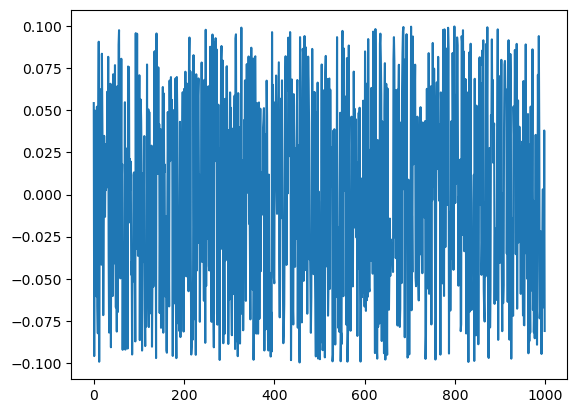

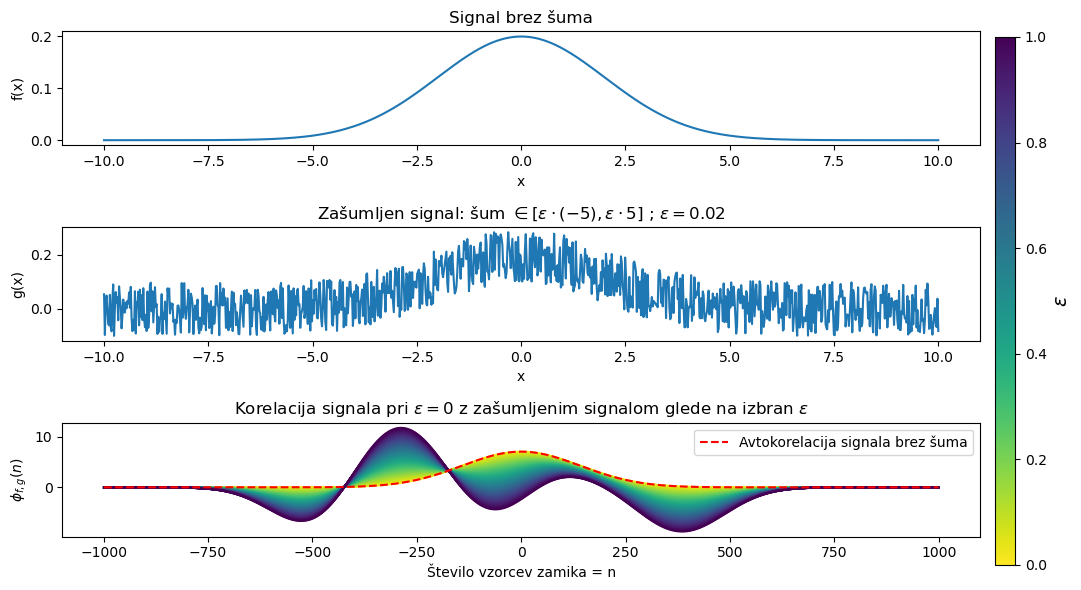

In [58]:
#korelacija signala z istim signalom a zašumljenim
x = np.linspace(-10,10,1000)
dx = x[1]-x[0]
# x2 = np.linspace(-10,10,100)
y1 = gaus(x,0,2)
seed = 10
np.random.seed(seed)
amp_max = 5


a = 0.02
amp = a* amp_max
noise = (np.random.rand(len(x))) * (2 * amp) - amp
plt.figure()
plt.plot(noise)
y2 = gaus(x,0,2) + noise



# cor1 = correlate(y1,y2)
cor2 = correlate(y1,y1)

x_cor = np.arange(-len(cor2)//2+1, len(cor2)//2+1, 1) #* dx
print((x_cor))
print(len(x_cor))
print(len(cor2))



# Create a figure and axes for all subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

# First subplot
axs[0].plot(x, y1, label='Signal brez šuma')
axs[0].set_title('Signal brez šuma')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

# Second subplot
axs[1].set_title(r'Zašumljen signal: šum $\in[\epsilon \cdot (-5),\epsilon \cdot 5]$ ; $\epsilon =$' + f'{a}')
axs[1].plot(x, y2, label='')
axs[1].set_xlabel('x')
axs[1].set_ylabel(r'g(x)')
# axs[1].legend()

a_s = np.linspace(0, 1, 100)
cmap = plt.get_cmap("viridis_r")
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
alphas = np.linspace(0.3,1,len(a_s))[::-1]
for ind,a in enumerate(a_s):
    np.random.seed(seed)
    amp = a * amp_max
    noise = (np.random.rand(len(x))) * (2 * amp) - amp
    y2 = gaus(x,0,2) + noise
    # y2 = noise
    # if ind < 5:
    #     axs[1].plot(x, y2, color=color,alpha=alphas[ind], label='Zašumljen signal')

    cor1 = np.correlate(y1, y2, mode='full')
    color = cmap(norm(a))
    axs[2].plot(x_cor,cor1, color=color)

# You can also plot the avtokorelacija here or any other plot in the third subplot
axs[2].plot(x_cor,cor2, label='Avtokorelacija signala brez šuma', color='red', linestyle='--')

axs[2].set_title(r'Korelacija signala pri $\epsilon=0$ z zašumljenim signalom glede na izbran $\epsilon$')
axs[2].set_xlabel('Število vzorcev zamika = n')
axs[2].set_ylabel(r'$\phi_{f,g}(n)$')
axs[2].legend()

cax = fig.add_axes([1, 0.05, 0.02, 0.88])
cbar = fig.colorbar(cm.ScalarMappable( cmap=cmap),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar.set_label(r'$\epsilon$', fontsize=14)

plt.tight_layout()

plt.savefig('sum_gaus',bbox_inches="tight")
plt.show()



[-999 -998 -997 ...  997  998  999]
1999
1999


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_7783/1056581929.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


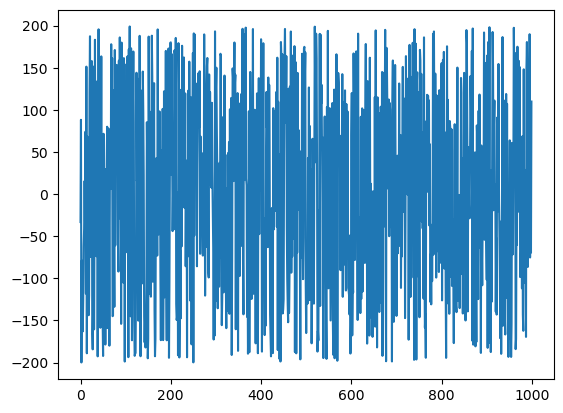

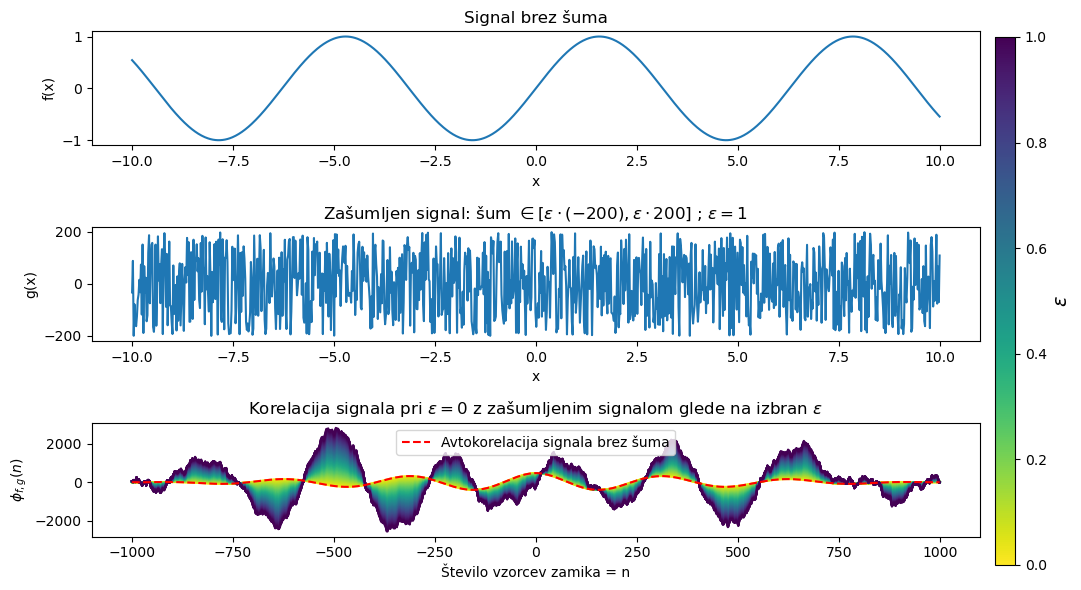

In [59]:
#korelacija signala z istim signalom a zašumljenim
x = np.linspace(-10,10,1000)
dx = x[1]-x[0]
# x2 = np.linspace(-10,10,100)
y1 =np.sin(x)
seed = 1
np.random.seed(seed)
amp_max = 200


a = 0.02
a = 1
amp = a* amp_max
noise = (np.random.rand(len(x))) * (2 * amp) - amp
plt.figure()
plt.plot(noise)
y2 = np.sin(x) + noise



# cor1 = correlate(y1,y2)
cor2 = correlate(y1,y1)

x_cor = np.arange(-len(cor2)//2+1, len(cor2)//2+1, 1) #* dx
print((x_cor))
print(len(x_cor))
print(len(cor2))



# Create a figure and axes for all subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

# First subplot
axs[0].plot(x, y1, label='Signal brez šuma')
axs[0].set_title('Signal brez šuma')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

# Second subplot
axs[1].set_title(r'Zašumljen signal: šum $\in[\epsilon \cdot (-200),\epsilon \cdot 200]$ ; $\epsilon =$' + f'{a}')
axs[1].plot(x, y2, label='')
axs[1].set_xlabel('x')
axs[1].set_ylabel(r'g(x)')
# axs[1].legend()

# Generate some data for the third subplot (you will need to define your own data)
a_s = np.linspace(0, 1, 100)
cmap = plt.get_cmap("viridis_r")
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
alphas = np.linspace(0.3,1,len(a_s))[::-1]
for ind,a in enumerate(a_s):
    np.random.seed(seed)
    amp = a * amp_max
    noise = (np.random.rand(len(x))) * (2 * amp) - amp
    y2 = np.sin(x) + noise
    # y2 = noise
    # if ind < 5:
    #     axs[1].plot(x, y2, color=color,alpha=alphas[ind], label='Zašumljen signal')

    cor1 = np.correlate(y1, y2, mode='full')
    color = cmap(norm(a))
    axs[2].plot(x_cor,cor1, color=color)

# You can also plot the avtokorelacija here or any other plot in the third subplot
axs[2].plot(x_cor,cor2, label='Avtokorelacija signala brez šuma', color='red', linestyle='--')

# Customize the third subplot further
# axs[2].set_title(r'Korelacija signala glede na amplitudo šuma')
axs[2].set_title(r'Korelacija signala pri $\epsilon=0$ z zašumljenim signalom glede na izbran $\epsilon$')
axs[2].set_xlabel('Število vzorcev zamika = n')
axs[2].set_ylabel(r'$\phi_{f,g}(n)$')
axs[2].legend()
# Add any additional customizations to the third subplot

cax = fig.add_axes([1, 0.05, 0.02, 0.88])
cbar = fig.colorbar(cm.ScalarMappable( cmap=cmap),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar.set_label(r'$\epsilon$', fontsize=14)
# Adjust the layout to prevent overlapping
plt.tight_layout()
# fig.suptitle('vpliv šuma na korelacijo signala; šum $\in[\epsilon \cdot (-5),\epsilon \cdot 5]$')

plt.savefig('sum_sin',bbox_inches="tight")
plt.show()


In [3]:
#prisluhnimo sovam

file_paths = ["/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/5_naloga_FFT/audio_files/bubomono.txt","/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/5_naloga_FFT/audio_files/bubo2mono.txt", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/5_naloga_FFT/audio_files/mix.txt", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/5_naloga_FFT/audio_files/mix1.txt", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/5_naloga_FFT/audio_files/mix2.txt", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/5_naloga_FFT/audio_files/mix22.txt" ]
frekvence = np.ones(np.shape(file_paths)) * 44100
nus_s=[]
ys = []
ts = []
Ns = []
for ind, file_path in enumerate(file_paths):
    print(ind)
    y = []
    with open(file_path, "r") as file:
        for line in file:
            y.append(float(line.strip()))


    dt = 1/frekvence[ind]
    t = np.arange(0,(np.shape(y)[0]) * dt - dt, dt)

    # plt.figure()
    # plt.plot(t,y)

    T = len(y) * dt
    N = len(y)
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    # print("kritična: ",nu_c)
    # print("min: ",nu_min)
    dft = 1/N * np.fft.fft(y)

    # y3 = correlate_fft2(y,y)
    # plt.figure()
    # plt.plot(y3,label="2")
    ys.append(y)
    ts.append(t)
    Ns.append(N)
    nus_s.append(nus[N//2:])



# np.save("dfts_bach", dfts)
# np.save("ts_bach", ts)
# np.save("Ns_bach", Ns)
# np.save('nus_s_bach', nus_s)

0
1
2
3
4
5


In [ ]:
x= np.array([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])
print(x[0:-1:10,:])

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_7783/3897963448.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  u_plot = np.array(ys)


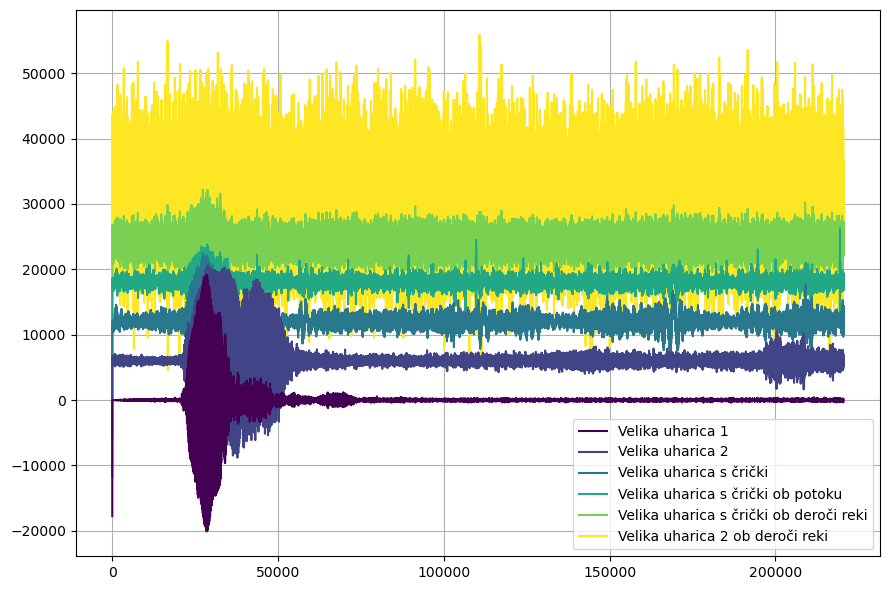

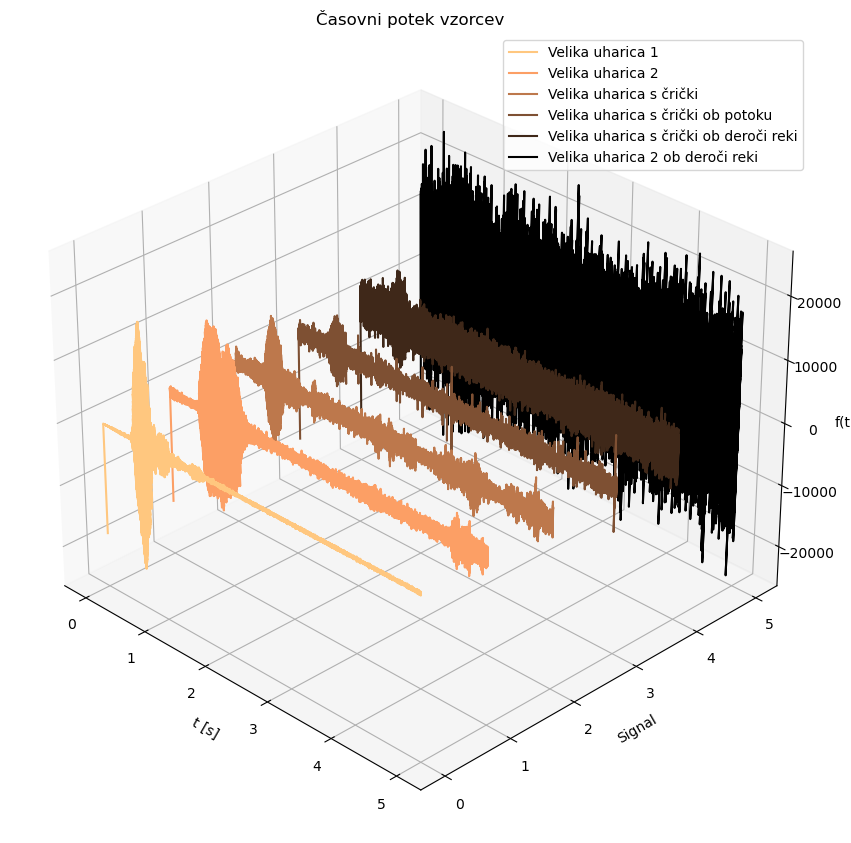

In [7]:
#prva sova:
imena = ["Velika uharica 1", "Velika uharica 2", 'Velika uharica s črički', 'Velika uharica s črički ob potoku', 'Velika uharica s črički ob deroči reki','Velika uharica 2 ob deroči reki']
plt.figure(figsize=(9,6))
cmap = plt.get_cmap("viridis")
a_s = [1,2,3,4,5,6]
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
alphas = np.linspace(0.6,1,len(a_s))
for ind1,y1 in enumerate(ys[:]):
    # for ind2,y2 in enumerate(ys[ind1:]):
    # plt.subplot(4,1,ind1+1)
    # cor = correlate_fft(y1,y1)
    # cor = cor/np.max(cor)

    color = cmap(norm(a_s[ind1]))
    x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
    # plt.xlim(-10000,10000)
    # plt.xlim(0,np.max(x_cor))
    # plt.ylim(-1.1,1.1)
    plt.plot(np.array(y1)+ ind1 * 6000,color=color, label=f'{imena[ind1]}',zorder=1000 - ind1)
    # plt.title(f'{imena[ind1]}')
plt.legend()
plt.grid()
plt.tight_layout()

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection= '3d')
left, bottom, width, height = 0.5, 1.1, 3, 0.8
ax = fig.add_axes([left, bottom, width, height], projection='3d')

# plt.set_cmap('jet_r')
# plt.set_cmap('copper')
cmap = plt.get_cmap("copper_r")
a_s = [1,2,3,4,5,6]
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
u_plot = np.array(ys)
for j in range(u_plot.shape[0]):
    js = j*np.ones(np.array(u_plot[j]).shape[0])
    color = cmap(norm(a_s[j]))
    dt = 1/44100
    t = np.arange(0,(np.shape(u_plot[j])[0]) * dt - dt, dt)
    # ax.plot(np.arange(len(u_plot[j])), js, u_plot[j] ,color=color, zorder=1000-j)
    ax.plot(t, js, u_plot[j] ,color=color, zorder=1000-j,label=f'{imena[j]}')

# ax.set_yticks(range(len(imena)))
# ax.set_yticklabels(imena)
ax.legend()

# Add labels to the axes
ax.set_xlabel('t [s]')
ax.set_ylabel('Signal')
ax.set_zlabel('f(t)')
plt.title('Časovni potek vzorcev')
ax.view_init(azim=-45, elev=30)  # Example values
fig.savefig('3d_potek')

kritična:  5.642769646189962e-67
min:  1.1285539292379924e-66
kritična:  2.03701780870255e-69
min:  4.0740356174051e-69
kritična:  7.353521399929388e-72
min:  1.4707042799858777e-71
kritična:  2.65458047289539e-74
min:  5.30916094579078e-74
kritična:  9.5828883929612e-77
min:  1.91657767859224e-76
kritična:  3.459369602451277e-79
min:  6.918739204902554e-79


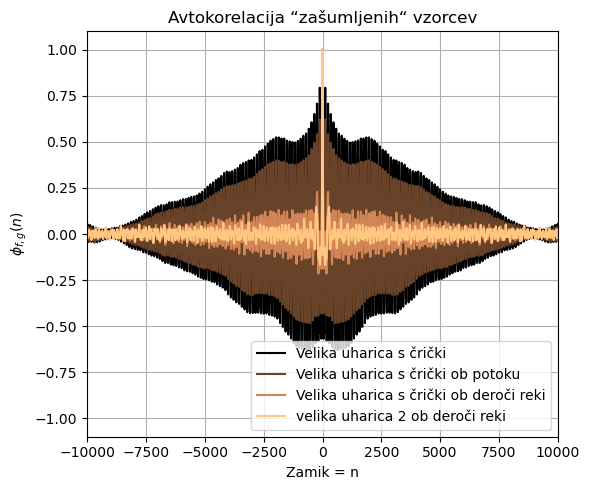

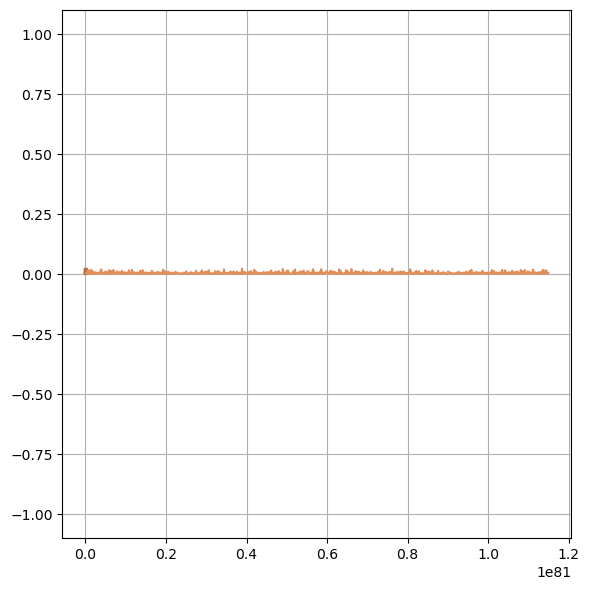

In [55]:
#vsi ploti
imena = ['Velika uharica s črički', 'Velika uharica s črički ob potoku', 'Velika uharica s črički ob deroči reki','velika uharica 2 ob deroči reki']
plt.figure(figsize=(6,5))
cmap = plt.get_cmap("copper")
a_s = [1,2,3,4]
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
alphas = np.linspace(0.6,1,len(a_s))
for ind1,y1 in enumerate(ys[2:]):
    # for ind2,y2 in enumerate(ys[ind1:]):
    # plt.subplot(4,1,ind1+1)
    # cor = correlate_fft(y1,y1)
    cor = correlate(y1,y1)
    cor = cor/np.max(cor)

    color = cmap(norm(a_s[ind1]))
    x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
    plt.xlim(-10000,10000)
    # plt.xlim(0,np.max(x_cor))
    plt.ylim(-1.1,1.1)
    plt.plot(x_cor,cor,color=color, label=f'{imena[ind1]}')
# plt.plot(x_cor,cor,color=color, label=f'{imena[ind1]}')
    # plt.title(f'{imena[ind1]}')
    plt.ylabel(r'$\phi_{f,g}(n)$')
# cor = correlate_fft(ys[-1],ys[-1])
# cor = cor/np.max(cor)
plt.xlabel("Zamik = n")
plt.title('Avtokorelacija “zašumljenih“ vzorcev')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.savefig('avtokor_sum_sove')

#vsi ploti
imena = ["Velika uharica","Velika uharica 2", 'Velika uharica s črički', 'Velika uharica s črički ob potoku', 'Velika uharica s črički ob deroči reki','velika uharica 2 ob deroči reki']
plt.figure(figsize=(6,6))
cmap = plt.get_cmap("copper")
a_s = [1,2,3,4,5,6,7,8]
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
alphas = np.linspace(0.6,1,len(a_s))
for ind1,y1 in enumerate(ys):
    # plt.subplot(len(ys),1,ind1+1)

    T = len(y1) * dt
    N = len(y)
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    print("kritična: ",nu_c)
    print("min: ",nu_min)
    dft = 1/N * np.fft.fft(y)

    color = cmap(norm(a_s[ind1]))
    x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
    # plt.xlim(-10000,10000)
    # plt.xlim(0,np.max(x_cor))
    plt.ylim(-1.1,1.1)
    # plt.plot(x_cor,cor,color=color, label=f'{imena[ind1]}')
    plt.plot(t[1:],(np.abs(dft)**2)[1:],color=color, label=f'{imena[ind1]}')
# cor = correlate_fft(ys[0],ys[0])
# cor = cor/np.max(cor)
# plt.plot(x_cor,cor,color=color, label=f'{imena[ind1]}')
    # plt.title(f'{imena[ind1]}')
# plt.legend()
plt.grid()
plt.tight_layout()

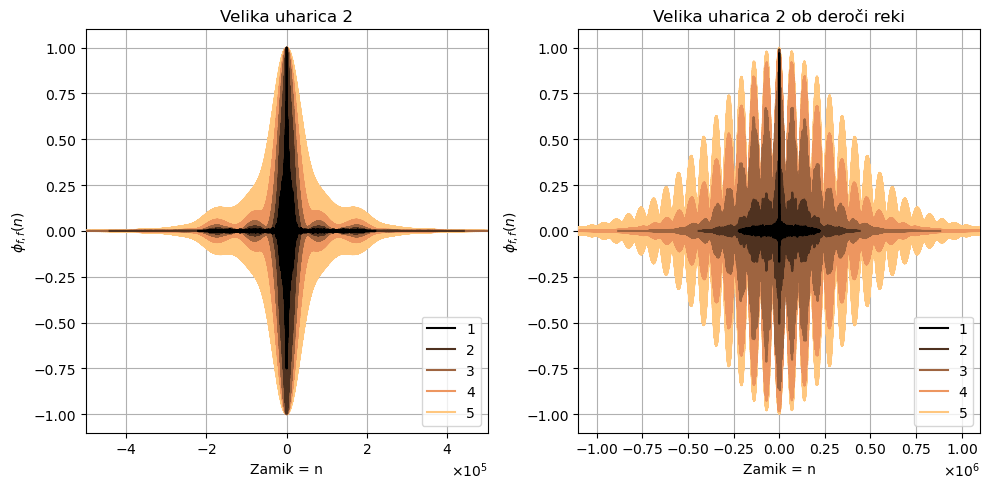

In [26]:
from matplotlib.ticker import ScalarFormatter

imena = ['Velika uharica s črički', 'Velika uharica s črički ob potoku', 'Velika uharica s črički ob deroči reki','velika uharica 2 ob deroči reki']
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
cmap = plt.get_cmap("copper")
a_s = [1,2,3,4]
a_s = np.arange(5)
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
alphas = np.linspace(0.6,1,len(a_s))
cor = ys[-1]
for ind1,y1 in enumerate(a_s):
    # for ind2,y2 in enumerate(ys[ind1:]):
    # plt.subplot(4,1,ind1+1)
    cor = correlate(cor,cor)
    cor = cor/np.max(cor)

    color = cmap(norm(a_s[ind1]))
    x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
    plt.xlim(-1100000,1100000)
    # plt.xlim(-0.25*1e6,0.25*1e6)
    # plt.xlim(0,np.max(x_cor))
    plt.ylim(-1.1,1.1)
    plt.plot(x_cor[::10],cor[::10],color=color, label=f'{ind1+1}',zorder=100-ind1)
# cor = correlate_fft(ys[0],ys[0])
# cor = cor/np.max(cor)
# plt.plot(x_cor,cor,color=color, label=f'{imena[ind1]}')
    # plt.title(f'{imena[ind1]}')
plt.ylabel(r'$\phi_{f,f}(n)$')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlabel("Zamik = n")
plt.title('Velika uharica 2 ob deroči reki')

plt.legend(loc='lower right')
plt.grid()
# plt.savefig('avtokor_sum_sove')

imena = ['Velika uharica s črički', 'Velika uharica s črički ob potoku', 'Velika uharica s črički ob deroči reki','Velika uharica 2 ob deroči reki']

plt.subplot(1,2,1)
cmap = plt.get_cmap("copper")
a_s = [1,2,3,4]
a_s = np.arange(5)
norm = Normalize(vmin=min(a_s), vmax=max(a_s))
alphas = np.linspace(0.6,1,len(a_s))
cor = ys[1]
for ind1,y1 in enumerate(a_s):
    # for ind2,y2 in enumerate(ys[ind1:]):
    # plt.subplot(4,1,ind1+1)
    cor = correlate(cor,cor)
    cor = cor/np.max(cor)

    color = cmap(norm(a_s[ind1]))
    x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
    plt.xlim(-0.5*1e6,0.5*1e6)
    # plt.xlim(-1100000,1100000)
    # plt.xlim(0,np.max(x_cor))
    plt.ylim(-1.1,1.1)
    plt.plot(x_cor[::10],cor[::10],color=color, label=f'{ind1+1}',zorder=100-ind1)
# cor = correlate_fft(ys[0],ys[0])
# cor = cor/np.max(cor)
# plt.plot(x_cor,cor,color=color, label=f'{imena[ind1]}')
    # plt.title(f'{imena[ind1]}')
plt.ylabel(r'$\phi_{f,f}(n)$')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlabel("Zamik = n")
plt.title('Velika uharica 2')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.savefig('vec_avtokor_sum_sova2')

In [ ]:
x = np.array([1,2,3,4,5,6])
print(x[1:])

In [ ]:
#vsi ploti
#sova 1
# for ind1,y1 in enumerate(ys):
imena = ["Velika uharica 1", 'Velika uharica 2', 'Velika uharica s črički', 'Velika uharica s črički ob potoku', 'Velika uharica s črički ob deroči reki','velika uharica 2 ob deroči reki']
plt.figure(figsize=(8,8))
plt.suptitle('Sova 1')
ys = np.array(ys)
ind1,y1 = 0,ys[0]

imena1 = [imena[0]]
for i in imena[2:]:
    imena1.append(i)
print(imena1)

for ind2,y2 in enumerate(np.concatenate((ys[:1], ys[2:]))):
    # if ind2 == 1:
    #     continue
    print(len(y1),len(y2))
    cor = correlate(y1,y2)
    cor /= np.max(cor)
    x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
    print(ind2 +1)
    plt.subplot(5,1,ind2+1)
    plt.plot(x_cor,cor,c='black', label=f'{imena1[ind2]}')
    plt.ylim(-1.05,1.05)
    plt.grid()
    plt.legend()
    plt.ylabel(r'$\phi_{f,g}(n)$')
plt.xlabel("Zamik = n")
plt.tight_layout()
plt.savefig('sova1')

plt.figure(figsize=(8,8))
ys = np.array(ys)

ind1,y1 = 1,ys[1]

imena2 = imena[1:]
print(imena2)

for ind2,y2 in enumerate(ys[1:]):
    # if ind2 == 1:
    #     continue
    print(len(y1),len(y2))
    cor = correlate(y1,y2)
    cor /= np.max(cor)
    x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
    print(ind2 +1)
    plt.subplot(5,1,ind2+1)
    plt.plot(x_cor,cor,c='black', label=f'{imena2[ind2]}')
    plt.ylim(-1.05,1.05)
    plt.grid()
    plt.legend()
    plt.ylabel(r'$\phi_{f,g}(n)$')
plt.xlabel("Zamik = n")
plt.suptitle('Sova 2')
plt.tight_layout()
plt.savefig('sova2')

no res
['1', '1', '3', '2', '0', '0', '0', '1', '2', '4', '2', '0', '1', '2', '0', '2', '1', '2', '0', '1', '2', '3', '3', '2', '2', '0', '1', '2', '1', '2', '0', '0', '0', '2', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '2', '3', '2', '0', '0', '0', '0', '1', '0', '0', '1', '3', '2', '0', '1', '1', '1', '3', '2', '1', '3', '1', '3', '1', '0', '0', '3', '1', '4', '7', '1', '3', '1', '1', '3', '4', '1', '2', '2', '3', '3', '1', '0', '2', '3', '1', '2', '2', '5', '1', '0', '1', '2', '2', '1', '2', '1', '2', '0', '3', '4', '3', '1', '2', '2', '1', '1', '6', '3', '2', '2', '1', '1', '0', '2', '3', '0', '1', '2', '3', '0', '6', '3', '1', '4', '3', '0', '0', '4', '3', '3', '4', '2', '2', '0', '4', '3', '1', '0', '1', '3', '1', '1', '1', '4', '1', '0', '3', '0', '2', '1', '2', '1', '2', '1', '1', '0', '1', '2', '0', '2', '2', '2', '2', '4', '0', '1', '0', '1', '1', '2', '2', '2', '0', '0', '2', '1', '1', '0', '2', '1', '3', '2', '5', '0', '1', '7', '2', '2', '4', '1', '1', '4

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_7783/1742857650.py:144: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_7783/1742857650.py:151: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


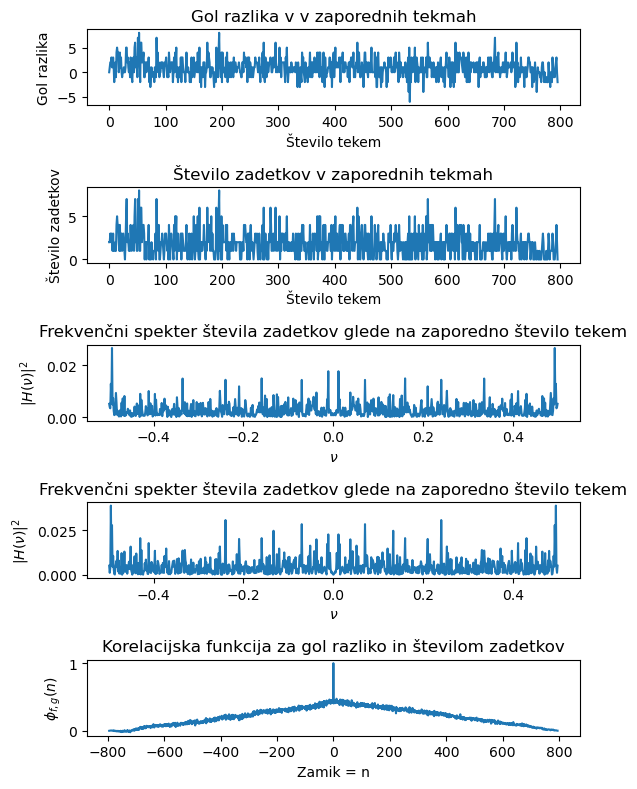

In [96]:
from datetime import datetime

file_path= "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/chelsea_22_23.txt"
file_path= "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/chelsea.txt"
y = []
goals = []
days = []
goal_d = []
with open(file_path, "r") as file:

    for ind,line in enumerate(file):
        if line != '\n' and line != '':
            try:
                info = line.strip()
                parts= info.split('\t')
                date_str= parts[0]
                teams= parts[1]
                outcome= parts[2]
                res=parts[3]
                league= parts[4]
                

                # Create a datetime object from the date string
                date = datetime.strptime(date_str, '%d %b %Y')

                # Define the reference date (January 1, 2020)
                reference_date = datetime(2015, 1, 1)

                # Calculate the difference in days
                days_difference = (date - reference_date).days


                if "Chelsea" in teams.split('v')[0]:
                    try:
                        goals.append(res[0])
                        days.append(days_difference)
                        goal_d.append(float(res[0])-float(res[2]))
                    except:
                        print('no res')
                else:
                    # print(goals)
                    goals.append(res[2])
                    days.append(days_difference)
                    goal_d.append(float(res[2])-float(res[0]))
                
            except:
                continue
            # print(parts, date, teams, res, league)

            # goals.append()

print(goals)
print(days)
print(goal_d)
goals = np.array(goals,dtype=float)
goal_d = np.array(goal_d,dtype=float)

plt.figure(figsize=(6,8))

sort_indices = np.argsort(days)

goals = np.array(goals)[sort_indices]
goal_d =np.array(goal_d)[sort_indices]
days = np.array(days)[sort_indices]

matches = np.arange(0,len(days),1)

# plt.plot(matches, goals)
# plt.title('Število zadetkov v zaporednih tekmah')
# plt.xlabel('Število tekem')
# plt.ylabel('Število zadetkov')
plt.subplot(5,1,1)
plt.plot(matches, goal_d)
plt.title('Gol razlika v v zaporednih tekmah')
plt.xlabel('Število tekem')
plt.ylabel('Gol razlika')
y1=goals 
y2=goal_d
y1 = np.array(y1,dtype=float)
y2 = np.array(y2,dtype=float)

plt.subplot(5,1,2)
plt.plot(matches, goals)
plt.title('Število zadetkov v zaporednih tekmah')
plt.xlabel('Število tekem')
plt.ylabel('Število zadetkov')
y1=goals 
y2=goal_d
y1 = np.array(y1,dtype=float)
y2 = np.array(y2,dtype=float)

dt = 1
T = len(y1) * dt
N = len(y1)
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)


# plt.subplot(4,1,2)
dft = 1/N * np.fft.fft(y1)[1:]
indices=np.argsort(abs(dft)**2)
# print(np.array(nus[1:])[indices][::-1])
# print(np.array(nus[1:])[indices][::-1])
# print(y)
cor = correlate(y1,y1)*1/N
cor = cor/np.max(cor)
x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
# plt.plot(x_cor,cor)
# plt.title('Avtokorelacijska funkcija')
# plt.xlabel(r'$\nu$')
# plt.ylabel(r"$|H(\nu)|^2$")
# plt.ylabel(r'$\phi_{f,f}(n)$')
# plt.xlabel("Zamik = n")



plt.subplot(5,1,3)
plt.title('Frekvenčni spekter števila zadetkov glede na zaporedno število tekem')
plt.xlabel(r'$\nu$')
plt.ylabel(r"$|H(\nu)|^2$")
plt.plot(nus[1:], np.abs(dft)**2)
plt.tight_layout()

dt = 1
T = len(y2) * dt
N = len(y2)
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)

plt.subplot(5,1,5)
dft = 1/N * np.fft.fft(y2)[1:]
indices=np.argsort(abs(dft)**2)
# print(np.array(nus[1:])[indices][::-1])
# print(np.array(nus[1:])[indices][::-1])
print(y)
cor = correlate(y1,y2)*1/N
cor = cor/np.max(cor)
x_cor = np.arange(-len(cor)//2+1, len(cor)//2+1, 1) #* dx
plt.plot(x_cor,cor,label='Korelacija med gol razliko in številom zadetkov')
plt.title('Korelacijska funkcija za gol razliko in številom zadetkov')
plt.xlabel(r'$\nu$')
plt.ylabel(r"$|H(\nu)|^2$")
plt.ylabel(r'$\phi_{f,g}(n)$')
plt.xlabel("Zamik = n")

plt.tight_layout()
plt.savefig("chelsea_3")
plt.subplot(5,1,4)
plt.title('Frekvenčni spekter števila zadetkov glede na zaporedno število tekem')
plt.xlabel(r'$\nu$')
plt.ylabel(r"$|H(\nu)|^2$")
plt.plot(nus[1:], np.abs(dft)**2)
plt.tight_layout()
plt.savefig("chelsea_3")
